<a href="https://colab.research.google.com/github/XiuZheng2001/img/blob/main/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
 
from torch.utils.data import  DataLoader
from torchvision import models
 
import torchvision.transforms as transforms
import torchvision.datasets as dataset


In [ ]:
modelVGG=models.vgg16(pretrained=True)
print(modelVGG)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

uint8


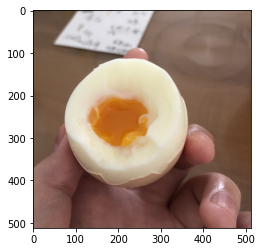

In [ ]:
resized_egg=cv.resize(cv.imread('./egg.jpg'),(512,512),interpolation=cv.INTER_AREA)
img = cv.cvtColor(resized_egg, cv.COLOR_BGR2RGB)
plt.imshow(img)
print(img.dtype)

In [ ]:
transform=transforms.Compose([
                               transforms.ToPILImage(),
                               transforms.RandomCrop(512),
                               transforms.ToTensor(),
                               transforms.Normalize([0.485,0.456,0.406],[0.229, 0.224, 0.225])
])
#先transform，再unsqueeze为torch模型可以接受的尺寸
img=np.array(img)
img=transform(img)
img=img.unsqueeze(0)
print(img.size())

torch.Size([1, 3, 512, 512])


In [ ]:
no_of_layers=0
conv_layers=[]

model_children=list(modelVGG.children())

for child in model_children:
    if type(child)==nn.Conv2d:
        no_of_layers+=1
        conv_layers.append(child)
    elif type(child)==nn.Sequential:
        for layer in child.children():
            if type(layer)==nn.Conv2d:
                no_of_layers+=1
                conv_layers.append(layer)
print(no_of_layers) #共有13个conv2d layer

13


In [ ]:
results=[conv_layers[0](img)]
# 求解所有conv layer的输出：
for i in range(1, len(conv_layers)):
    results.append(conv_layers[i](results[-1])) # 每一次的输入为results[-1]，即上一层的输出。
outputs = results

for num_layer in range(len(outputs)):
    plt.figure(figsize=(50, 10))
    layer_viz = outputs[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print("Layer ",num_layer+1)
    for i, filter in enumerate(layer_viz):
        if i == 2:    #每个layer绘制i张输出
            break
        plt.subplot(2, 1, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    plt.show()
    plt.close()